In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder


np.random.seed(42)

iris = load_iris()
X = iris.data
y = iris.target

le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from neighbours import KNN

knn = KNN(k_neighbors=3)

knn.fit(X_train, y_train)

In [20]:
knn_preds = knn.predict(X_test)

<Axes: >

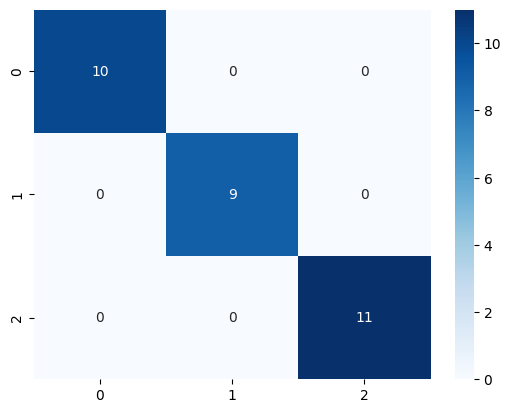

In [21]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, knn_preds))

1.0


In [23]:
import matplotlib.pyplot as plt


def plot_data_and_predictions(X, y, knn_preds):
    # Create a scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    
    # Create a scatter plot of the predicted points
    plt.scatter(X[:, 0], X[:, 1], c=knn_preds, cmap='viridis', marker='x')
    
    # Set labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data and Predictions')
    
    # Show the plot
    plt.show()

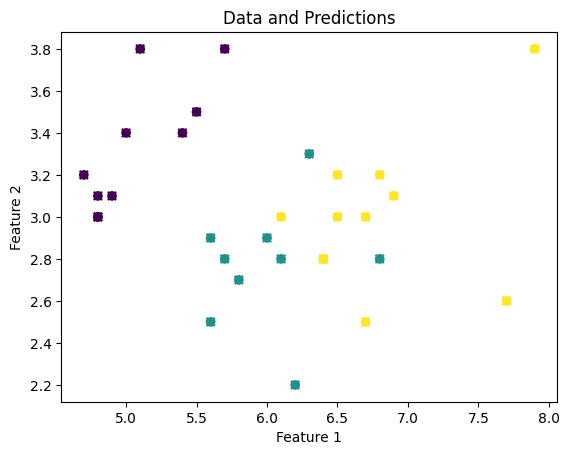

In [24]:
plot_data_and_predictions(X_test, y_test, knn_preds)